<a href="https://colab.research.google.com/github/bonaerges/pia/blob/main/TareaDeepLearningKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.activations import elu
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.initializers import HeNormal
assert version.parse(tf.__version__) >= version.parse("2.8.0")

# Parte A: Construcción y Entrenamiento Inicial


## Construcción de la Red Neuronal:

  ## 20 capas ocultas, cada una con 100 neuronas.

*   20 capas ocultas, cada una con 100 neuronas

*   Inicialización de Xavier/Glorot.

*   Función de activación ELU.
*   Entrenamiento de la Red:
**   Uso del optimizador Adam.
**   Implementación de la detención temprana.

# Parte B: Integración de Mejoras y Comparación

*   Normalización por Lotes
 Implementación y comparación de la velocidad de convergencia y el impacto en
el tiempo de entrenamiento.


## Implementación y comparación de la velocidad de convergencia y el impacto en el tiempo de entrenamiento.
##Sustitución de Normalización por Lotes con ReLU:

## Uso de la inicialización He.
## Comparación de rendimiento entre configuraciones.

# Parte C: Avanzando en Regularización y Optimización
## Dropout y MC Dropout:
## Implementación de dropout.
## Evaluación con MC dropout sin reentrenamiento.
## Análisis de los efectos.

###Parte A: Construcción y Entrenamiento Inicial
### Cargar y prepara el dataset SVHN (Parte A, paso 1)

In [4]:
def load_data():
    (train_data, test_data), ds_info = tfds.load(
        'svhn_cropped',
        split=['train', 'test'],
        as_supervised=True,
        with_info=True,
        batch_size=-1
    )
    return train_data, test_data, ds_info

## Cargar y preparar datos

In [5]:
train_data, test_data, ds_info = load_data()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/73257 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/3.0.0.incompleteV9U3Y1/svhn_cropped-train.tfrecord*...:   0%|…

Generating test examples...:   0%|          | 0/26032 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/3.0.0.incompleteV9U3Y1/svhn_cropped-test.tfrecord*...:   0%| …

Generating extra examples...:   0%|          | 0/531131 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/3.0.0.incompleteV9U3Y1/svhn_cropped-extra.tfrecord*...:   0%|…

Dataset svhn_cropped downloaded and prepared to /root/tensorflow_datasets/svhn_cropped/3.0.0. Subsequent calls will reuse this data.


### Preprocesar los datos (Parte A, paso 1)

In [6]:
def preprocess(data, info):
    x, y = data
    x = tf.image.convert_image_dtype(x, tf.float32)
    y = tf.one_hot(y, depth=info.features['label'].num_classes)
    return x, y

In [7]:
train_data = preprocess(train_data, ds_info)
test_data = preprocess(test_data, ds_info)

### Construir el modelo inicial con Xavier/Glorot y ELU (Parte A, paso 1 y 2)
### 20 capas ocultas, cada una con 100 neuronas

In [8]:
def build_model(input_shape, num_classes):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    for _ in range(20):
        model.add(Dense(100, activation=elu, kernel_initializer=GlorotUniform()))
    model.add(Dense(num_classes, activation='softmax'))
    return model

### Construir y entrenar el modelo inicial, y  entrenamiento inicial (Parte A)


In [9]:
model = build_model(train_data[0].shape[1:], ds_info.features['label'].num_classes)

 # Compilar y entrenar el modelo (Parte A, paso 2)

In [10]:
def compile_and_train(model, train_data, val_data, epochs=50):
    model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(train_data[0], train_data[1], epochs=epochs,
                        validation_data=val_data, callbacks=[early_stopping])
    return history

In [11]:
history = compile_and_train(model, train_data, test_data)

Epoch 1/50
2290/2290 [==============================] - 33s 13ms/step - loss: 2.2499 - accuracy: 0.1834 - val_loss: 2.2312 - val_accuracy: 0.1594
Epoch 2/50
2290/2290 [==============================] - 27s 12ms/step - loss: 2.2406 - accuracy: 0.1875 - val_loss: 2.2304 - val_accuracy: 0.1959
Epoch 3/50
2290/2290 [==============================] - 27s 12ms/step - loss: 2.2393 - accuracy: 0.1885 - val_loss: 2.2247 - val_accuracy: 0.1959
Epoch 4/50
2290/2290 [==============================] - 31s 14ms/step - loss: 2.2388 - accuracy: 0.1891 - val_loss: 2.2254 - val_accuracy: 0.1959
Epoch 5/50
2290/2290 [==============================] - 27s 12ms/step - loss: 2.2378 - accuracy: 0.1892 - val_loss: 2.2256 - val_accuracy: 0.1959
Epoch 6/50
2290/2290 [==============================] - 27s 12ms/step - loss: 2.2378 - accuracy: 0.1892 - val_loss: 2.2254 - val_accuracy: 0.1959
Epoch 7/50
2290/2290 [==============================] - 26s 12ms/step - loss: 2.2374 - accuracy: 0.1892 - val_loss: 2.2250 -

### Construir y entrenar el modelo con normalización por lotes
### Función para construir el modelo con normalización por lotes (Parte B, paso 1)

In [12]:
def build_model_with_batchnorm(input_shape, num_classes):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    for _ in range(20):
        model.add(Dense(100, kernel_initializer=GlorotUniform()))
        model.add(BatchNormalization())
        model.add(Activation('elu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [13]:
model_bn = build_model_with_batchnorm(train_data[0].shape[1:], ds_info.features['label'].num_classes)

### Mejora con batch normalization (Parte B, paso 1)

In [14]:
history_bn = compile_and_train(model_bn, train_data, test_data)

Epoch 1/50
2290/2290 [==============================] - 62s 19ms/step - loss: 1.5734 - accuracy: 0.4773 - val_loss: 1.7075 - val_accuracy: 0.4465
Epoch 2/50
2290/2290 [==============================] - 46s 20ms/step - loss: 1.2817 - accuracy: 0.5964 - val_loss: 1.3583 - val_accuracy: 0.5853
Epoch 3/50
2290/2290 [==============================] - 39s 17ms/step - loss: 1.1824 - accuracy: 0.6329 - val_loss: 1.7063 - val_accuracy: 0.4457
Epoch 4/50
2290/2290 [==============================] - 44s 19ms/step - loss: 1.1043 - accuracy: 0.6588 - val_loss: 1.0973 - val_accuracy: 0.6618
Epoch 5/50
2290/2290 [==============================] - 40s 17ms/step - loss: 1.0410 - accuracy: 0.6778 - val_loss: 1.2700 - val_accuracy: 0.6083
Epoch 6/50
2290/2290 [==============================] - 40s 17ms/step - loss: 0.9952 - accuracy: 0.6926 - val_loss: 1.2512 - val_accuracy: 0.6065
Epoch 7/50
2290/2290 [==============================] - 41s 18ms/step - loss: 0.9459 - accuracy: 0.7097 - val_loss: 0.9962 -

### Función para construir el modelo con ReLU y He (Parte B, paso 2)
### 20 capas ocultas, cada una con 100 neuronas

In [15]:
def build_model_with_relu_he(input_shape, num_classes):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    for _ in range(20):
        model.add(Dense(100, kernel_initializer=HeNormal()))
        model.add(Activation('relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

### Construir y entrenar el modelo con ReLU y He

In [16]:
model_relu_he = build_model_with_relu_he(train_data[0].shape[1:], ds_info.features['label'].num_classes)

In [17]:
history_relu_he = compile_and_train(model_relu_he, train_data, test_data)

Epoch 1/50
2290/2290 [==============================] - 33s 13ms/step - loss: 2.2421 - accuracy: 0.1881 - val_loss: 2.2259 - val_accuracy: 0.1959
Epoch 2/50
2290/2290 [==============================] - 27s 12ms/step - loss: 2.2376 - accuracy: 0.1892 - val_loss: 2.2252 - val_accuracy: 0.1959
Epoch 3/50
2290/2290 [==============================] - 27s 12ms/step - loss: 2.2372 - accuracy: 0.1892 - val_loss: 2.2235 - val_accuracy: 0.1959
Epoch 4/50
2290/2290 [==============================] - 26s 11ms/step - loss: 2.2371 - accuracy: 0.1892 - val_loss: 2.2245 - val_accuracy: 0.1959
Epoch 5/50
2290/2290 [==============================] - 26s 12ms/step - loss: 2.2372 - accuracy: 0.1892 - val_loss: 2.2242 - val_accuracy: 0.1959
Epoch 6/50
2290/2290 [==============================] - 27s 12ms/step - loss: 2.2369 - accuracy: 0.1892 - val_loss: 2.2242 - val_accuracy: 0.1959
Epoch 7/50
2290/2290 [==============================] - 26s 12ms/step - loss: 2.2370 - accuracy: 0.1892 - val_loss: 2.2248 -

### Imprimir las métricas del entrenamiento para comparación

In [18]:
print("Historial inicial:", history.history)
print("Historial con Normalización por Lotes:", history_bn.history)
print("Historial con ReLU y He:", history_relu_he.history)

Historial inicial: {'loss': [2.2498555183410645, 2.2406461238861084, 2.239272117614746, 2.238835096359253, 2.2377989292144775, 2.237816572189331, 2.2373952865600586, 2.2374372482299805, 2.2374353408813477, 2.237171173095703, 2.2372777462005615, 2.2370245456695557, 2.237596273422241, 2.2369723320007324, 2.2369275093078613, 2.2372894287109375, 2.236874580383301, 2.2371840476989746, 2.237182378768921], 'accuracy': [0.18335449695587158, 0.1874769628047943, 0.18847346305847168, 0.18906043469905853, 0.18921059370040894, 0.18923789262771606, 0.18921059370040894, 0.18912868201732635, 0.1891832798719406, 0.18921059370040894, 0.18921059370040894, 0.18921059370040894, 0.18895122408866882, 0.18921059370040894, 0.18921059370040894, 0.1891150325536728, 0.18921059370040894, 0.18914233148097992, 0.1891150325536728], 'val_loss': [2.2311558723449707, 2.2303543090820312, 2.2247049808502197, 2.2254481315612793, 2.2255859375, 2.225372314453125, 2.22499680519104, 2.224379062652588, 2.2255194187164307, 2.224

## Parte C: Avanzando en Regularización y Optimización
* Introducir Dropout

In [19]:
from tensorflow.keras.layers import Dropout

### Función para construir el modelo con dropout (Parte C, paso 1)

In [20]:
def build_model_with_dropout(input_shape, num_classes, dropout_rate=0.5):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    for _ in range(20):
        model.add(Dense(100, activation='elu', kernel_initializer=GlorotUniform()))
        model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    return model

### Función para realizar predicciones utilizando MC Dropout (Parte C, paso 2)

In [21]:
def mc_dropout_predict(model, data, num_samples=100):
    predictions = [model(data, training=True) for _ in range(num_samples)]
    return tf.reduce_mean(predictions, axis=0)

### Construir y entrenar el modelo con dropout



In [22]:
model_dropout = build_model_with_dropout(train_data[0].shape[1:], ds_info.features['label'].num_classes)
history_dropout = compile_and_train(model_dropout, train_data, test_data)

Epoch 1/50
2290/2290 [==============================] - 37s 14ms/step - loss: 2.4941 - accuracy: 0.1512 - val_loss: 2.2258 - val_accuracy: 0.1959
Epoch 2/50
2290/2290 [==============================] - 30s 13ms/step - loss: 2.2502 - accuracy: 0.1836 - val_loss: 2.2266 - val_accuracy: 0.1959
Epoch 3/50
2290/2290 [==============================] - 33s 15ms/step - loss: 2.2489 - accuracy: 0.1842 - val_loss: 2.2280 - val_accuracy: 0.1959
Epoch 4/50
2290/2290 [==============================] - 31s 14ms/step - loss: 2.2512 - accuracy: 0.1839 - val_loss: 2.2244 - val_accuracy: 0.1959
Epoch 5/50
2290/2290 [==============================] - 34s 15ms/step - loss: 2.2498 - accuracy: 0.1838 - val_loss: 2.2266 - val_accuracy: 0.1959
Epoch 6/50
2290/2290 [==============================] - 31s 13ms/step - loss: 2.2499 - accuracy: 0.1841 - val_loss: 2.2257 - val_accuracy: 0.1959
Epoch 7/50
2290/2290 [==============================] - 32s 14ms/step - loss: 2.2506 - accuracy: 0.1829 - val_loss: 2.2249 -

### Utilizar MC Dropout para evaluar el modelo en el conjunto de test,  Evluación con MC Dropout (Parte C, paso 2)

In [23]:
mc_predictions = mc_dropout_predict(model_dropout, test_data[0])


###  Calcular la precisión final con MC Dropout

In [24]:
mc_accuracy = tf.metrics.categorical_accuracy(test_data[1], mc_predictions)
mc_accuracy_mean = tf.reduce_mean(mc_accuracy)

### Imprimir las métricas

In [25]:
print("Historial con Dropout:", history_dropout.history)
print("Precisión media con MC Dropout:", mc_accuracy_mean.numpy())

Historial con Dropout: {'loss': [2.494129180908203, 2.2501778602600098, 2.2488741874694824, 2.251193046569824, 2.2498066425323486, 2.2499442100524902, 2.250640392303467, 2.2511844635009766, 2.2507412433624268], 'accuracy': [0.15116643905639648, 0.1836138516664505, 0.18422812223434448, 0.18387320637702942, 0.18379130959510803, 0.18405066430568695, 0.1828903704881668, 0.18373671174049377, 0.18390052020549774], 'val_loss': [2.2257986068725586, 2.2265751361846924, 2.2280306816101074, 2.224374294281006, 2.226576328277588, 2.2257444858551025, 2.224923610687256, 2.227400064468384, 2.230138063430786], 'val_accuracy': [0.19587430357933044, 0.19587430357933044, 0.19587430357933044, 0.19587430357933044, 0.19587430357933044, 0.19587430357933044, 0.19587430357933044, 0.19587430357933044, 0.19587430357933044]}
Precisión media con MC Dropout: 0.1958743


## Gráficos de las Curvas de Entrenamiento y Validación

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

In [27]:
def plot_history(histories, titles):
    plt.figure(figsize=(14, 5))
    for i, (history, title) in enumerate(zip(histories, titles)):
        plt.subplot(1, len(histories), i+1)
        plt.plot(history.history['accuracy'], label='train_accuracy')
        plt.plot(history.history['val_accuracy'], label='val_accuracy')
        plt.title('Model Accuracy - ' + title)
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

### Suponiendo que history, history_bn, history_relu_he, history_dropout son los históricos obtenidos de cada modelo

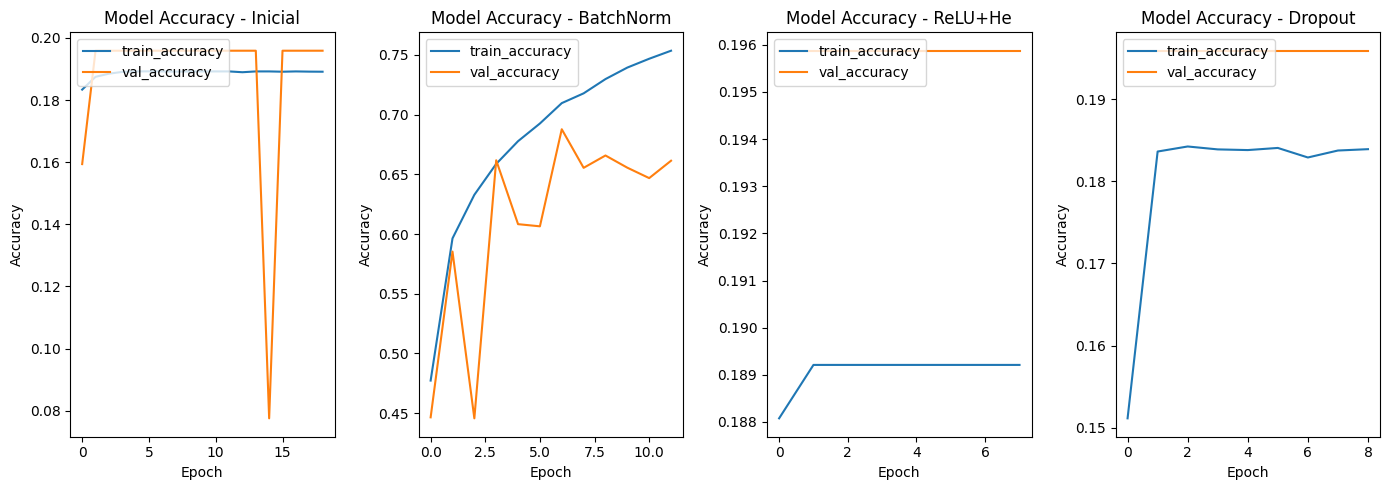

In [28]:
plot_history([history, history_bn, history_relu_he, history_dropout],
             ['Inicial', 'BatchNorm', 'ReLU+He', 'Dropout'])

### Optimización de Hiperparámetros

In [29]:
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch

ModuleNotFoundError: No module named 'kerastuner'

### funcion

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))  # Ajusta según la forma de tus datos de entrada

    # Permite a Keras Tuner decidir el número de neuronas en las primeras dos capas Dense
    for i in range(2):  # Dos capas densas
        model.add(keras.layers.Dense(
            units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
            activation='relu'))

    model.add(keras.layers.Dense(10, activation='softmax'))  # Ajusta según el número de clases

    # Permite a Keras Tuner decidir la tasa de aprendizaje
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy'])

    return model


### # Crear el tuner y realizar la búsqueda de hiperparámetros

In [ ]:
tunner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Número máximo de configuraciones de prueba
    executions_per_trial=3,  # Número de modelos que se entrenan por prueba
    directory='logs',  # Directorio para almacenar logs
    project_name='keras_tuner_demo')

### Obtener el mejor modelo

In [ ]:
tuner.search(x_train, y_train, epochs=10, validation_split=0.2)
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluar el mejor modelo

In [ ]:
loss, accuracy = best_model.evaluate(x_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")